In [1]:
from Bending.FullBending import FullBending
import numpy as np
import pandas as pd

In [2]:
# E [GPa]
# nucleo	 4.22
# X	        26.95
# SX	    13.57
# Y	        97.86
# SY	     4.22

# df_layers = pd.DataFrame({ 'E': [0.79818    ,   # nucleo
#                                  1.38664	,   # X
#                                  0.89186	,   # SX
#                                  5.44228    ,   # Y
#                                  0.97900]}  ,   # SY
#                                  index=['nucleo', 'X', 'SX', 'Y', 'SY'])

# df_layers = pd.DataFrame({ 'E': [0.79818    ,   # nucleo
#                                  1.38664	,   # X
#                                  0.89186	,   # SX
#                                  20.44228    ,   # Y
#                                  0.97900]}  ,   # SY
#                                  index=['nucleo', 'X', 'SX', 'Y', 'SY'])

df_layers = pd.DataFrame({ 'E': [0.058472    ,   # nucleo
                                 0.788232	,   # X
                                 1.114349	,   # SX
                                 8.328100    ,   # Y
                                 1.487333]}  ,   # SY
                                 index=['nucleo', 'X', 'SX', 'Y', 'SY'])

In [3]:
df_layers

,E
nucleo,0.058472
X,0.788232
SX,1.114349
Y,8.328100
SY,1.487333


In [4]:
composition = [
        ["Y", "Y"],
        ["Y", "X"],
        ["Y", "SX"],
        ["Y", "SY"],
        ["Y", "SX" , "SY"],
        ["Y", "X"  , "SY"]
    ]


In [5]:
df_data = pd.read_csv("experimental.csv")
df_data["Modulo flexion [GPa]"] =  df_data["Modulo flexion [MPa]"]/1000
df_data = df_data.drop(columns=["Modulo flexion [MPa]"])
df_data = df_data.drop(columns=["Tension maxima [MPa]"])
df_data["Espesor [mm]"] = 0.5*df_data["Espesor [mm]"] + 0.5*df_data["Espesor_2 [mm]"]
df_data = df_data.drop(columns=["Espesor_2 [mm]"])

# 
#  Ancho [mm]-> B [mm]
#  Espesor [mm] -> t [mm]
#  Modulo flexion [MPa] -> E [GPa]

df_data["B [mm]"] = df_data["Ancho [mm]"]
df_data["t [mm]"] = df_data["Espesor [mm]"]
df_data["E [GPa]"] = df_data["Modulo flexion [GPa]"]

df_data = df_data.drop(columns=["Ancho [mm]"])
df_data = df_data.drop(columns=["Espesor [mm]"])
df_data = df_data.drop(columns=["Modulo flexion [GPa]"])

df_stats = df_data.groupby('Nombre').agg(['mean', 'std'])
df_stats["layers"] = composition



In [6]:
from validation.FullExperimental import FullExperimental

full = FullExperimental()
full

Et [GPa]                 % e            Smax [MPa]             \
          mean       std      mean       std        mean        std   
Name                                                                  
TFP1  2.885509  0.227295  0.123306  0.009827  279.103333  14.337700   
TFP2  2.258503  0.065626  0.087556  0.002840  153.360000   0.473181   
TFP3  2.000437  0.004435  0.087444  0.002164  137.113333   4.996812   
TFP4  2.451362  0.114353  0.095472  0.005491  184.396667   1.356515   
TFP5  1.626582  0.120272  0.089889  0.013757   99.990000   9.790138   
TFP6  1.739870  0.067515  0.089083  0.010304  104.513333   7.708893   

       Eb [GPa]              t [mm]               b [mm]            \
           mean       std      mean       std       mean       std   
Name                                                                 
TFP1  13.201050  0.630858  5.266667  0.057735  25.600000  0.100000   
TFP2   9.869501  0.780113  4.700000  0.000000  25.566667  0.057735   
TFP3   9.222003  0.495965  4.833333  0.057735  25.400000  0.173205   
TFP4  10.181815  0.770635  4.700000  0.000000  25.666667  0.152753   
TFP5   6.143105  0.161637  5.700000  0.000000  25.166667  0.152753   
TFP6   7.798060  0.334186  5.600000  0.000000  25.033333  0.635085   

           layers     Vc  
                          
Name                      
TFP1          [Y]  0.178  
TFP2       [Y, X]  0.164  
TFP3      [Y, SX]  0.135  
TFP4      [Y, SY]  0.144  
TFP5  [Y, SX, SY]  0.146  
TFP6   [Y, X, SY]  0.180

In [7]:
df_stats

B [mm]              t [mm]              E [GPa]            \
             mean       std      mean       std       mean       std   
Nombre                                                                 
TFP1-1  25.600000  0.100000  5.100000  0.000000  13.201050  0.630858   
TFP2-1  25.566667  0.057735  4.600000  0.050000   9.869501  0.780113   
TFP3-1  25.400000  0.173205  4.866667  0.076376   9.222003  0.495965   
TFP4-1  25.666667  0.152753  4.600000  0.000000  10.181815  0.770635   
TFP5-1  25.166667  0.152753  5.716667  0.057735   6.143105  0.161637   
TFP6-1  25.033333  0.635085  5.566667  0.028868   7.798060  0.334186   

             layers  
                     
Nombre               
TFP1-1       [Y, Y]  
TFP2-1       [Y, X]  
TFP3-1      [Y, SX]  
TFP4-1      [Y, SY]  
TFP5-1  [Y, SX, SY]  
TFP6-1   [Y, X, SY]

In [ ]:

import os 
from copy import deepcopy
join = os.path.join


if not os.path.exists("output"):
    os.mkdir("output")

params = {
            "geo" : {
                        "t_n" : 3.025,
                        "t_l" : 0.476,
                        "Lx"  : 30,
                    },
            "sim" : {
                        "disp" : 0.5,
                    },
            "tensile" : {
                        "disp" : 2.0,
                    },
        }



In [9]:
df_layers

,E
nucleo,0.058472
X,0.788232
SX,1.114349
Y,8.328100
SY,1.487333


In [10]:
tl = params["geo"]["t_l"]
tn = params["geo"]["t_n"]
En = df_layers.loc["nucleo"]["E"]
EY = df_layers.loc["Y"]["E"]

In [11]:
(En*tn + 2*(2*EY*tl) )/(tn + 2*(2*tl) )

np.float64(3.252907324000811)

In [12]:
tl

0.476

In [13]:
tn

3.025

In [14]:
tn + 2*(2*tl) 

4.929

In [15]:
tn

3.025

In [16]:
El_vec = df_layers.iloc[1:].values.flatten()

all_params = []
E_pred = []
Et_pred = []
E_analy_pred = []
Et_analy_pred = []
for id_design in range(6):
    E_n =   df_layers.loc["nucleo"].values[-1]*1e3

    lyrs = df_stats["layers"].iloc[id_design]

    E_l = df_layers.loc[lyrs]["E"].values*1e3 # MPa
    name_mat = df_stats["layers"].iloc[id_design]
    name = df_stats.index[id_design]
    B    = df_stats["B [mm]"]["mean"].iloc[id_design]

    params_loop = deepcopy(params)

    B = 25
    params_loop["El"] = El_vec
    params_loop["geo"]["Ly"] = B
    # params_loop["geo"]["Ly"] = 0.25*B
    params_loop["sim"]["E_n"] = E_n
    params_loop["sim"]["E_l"] = E_l
    params_loop["sim"]["name_mat"] = name_mat
    params_loop["sim"]["opt"] = {
    "OMP_NUM_THREADS":4,
    "mpi_np":4,
    "mpi":False
}
    params_loop["output_folder"] = join("output", name)
    
    print(params)
    inp_f = FullBending(params_loop)
    Eflex = params_loop["Eflex"]

    E_pred.append(Eflex)
    Et_pred.append(params_loop["Etensile"])
    all_params.append(params_loop)


    E_analy_pred.append(params_loop["Eflexion_analytical"])
    Et_analy_pred.append(params_loop["Etensile_analytical"])

    print("Tracion: ", params_loop["Etensile"])
    print("Flexion: ", Eflex)

    

{'geo': {'t_n': 3.025, 't_l': 0.476, 'Lx': 30}, 'sim': {'disp': 0.5}, 'tensile': {'disp': 1.0}}
Running Calculix at:  output\TFP1-1\sim
Output file:  c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts\T02_BendingTest\NumericalModel\output\TFP1-1\sim\out.txt
Command:
 c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\.conda\Lib\site-packages\djccx\bin\ccx_dynamic.exe main
Error reading cvf file

pid:  1668 

Calculix finished

Running Calculix at:  output\TFP1-1\tensile
Output file:  c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts\T02_BendingTest\NumericalModel\output\TFP1-1\tensile\out.txt
Command:
 c:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\.conda\Lib\site-packages\djccx\bin\ccx_dynamic.exe main
Error reading cvf file

pid:  8572 

Calculix finished

Tracion:  3.252907524007549
Flexion:  2.3356014164352352
{'geo': {'t_n': 3.025, 't_l': 0.476, 'Lx': 30}, 'sim': {'disp': 0.5}, 'tensile': {'disp': 1.0}}
Running Calculix at:  output\TFP2-1\s

In [17]:
E_pred[-1]

np.float64(1.0932693082755796)

In [18]:
Et_pred[-1]

np.float64(1.7465688741994472)

In [19]:
df_stats["E pred [GPa]"]  = E_pred
df_stats["Et pred [GPa]"] = Et_pred
df_stats["E analytical pred [GPa]"]  = E_analy_pred
df_stats["Et analytical pred [GPa]"] = Et_analy_pred

tau_pred  = [ iall_params["geo"]["t_t"] for iall_params in all_params]
B_span    = [ iall_params["geo"]["Ly"] for iall_params in all_params]
df_stats["t pred [mm]"] = tau_pred
df_stats["B [mm]"] = B_span

In [20]:
df_stats

B [mm]        t [mm]              E [GPa]                 layers  \
         mean std      mean       std       mean       std                
Nombre                                                                    
TFP1-1     25  25  5.100000  0.000000  13.201050  0.630858       [Y, Y]   
TFP2-1     25  25  4.600000  0.050000   9.869501  0.780113       [Y, X]   
TFP3-1     25  25  4.866667  0.076376   9.222003  0.495965      [Y, SX]   
TFP4-1     25  25  4.600000  0.000000  10.181815  0.770635      [Y, SY]   
TFP5-1     25  25  5.716667  0.057735   6.143105  0.161637  [Y, SX, SY]   
TFP6-1     25  25  5.566667  0.028868   7.798060  0.334186   [Y, X, SY]   

       E pred [GPa] Et pred [GPa] E analytical pred [GPa]  \
                                                            
Nombre                                                      
TFP1-1     2.335601      3.252908                6.416550   
TFP2-1     1.403094      1.796638                2.837219   
TFP3-1     1.461444      1.859624                2.992033   
TFP4-1     1.524435      1.931664                3.169097   
TFP5-1     1.121453      1.799359                2.373209   
TFP6-1     1.093269      1.746569                2.282064   

       Et analytical pred [GPa] t pred [mm]  
                                             
Nombre                                       
TFP1-1                 3.252907       4.929  
TFP2-1                 1.796637       4.929  
TFP3-1                 1.859625       4.929  
TFP4-1                 1.931664       4.929  
TFP5-1                 1.799359       5.881  
TFP6-1                 1.746568       5.881

In [21]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Modulo Tracción [GPa]')

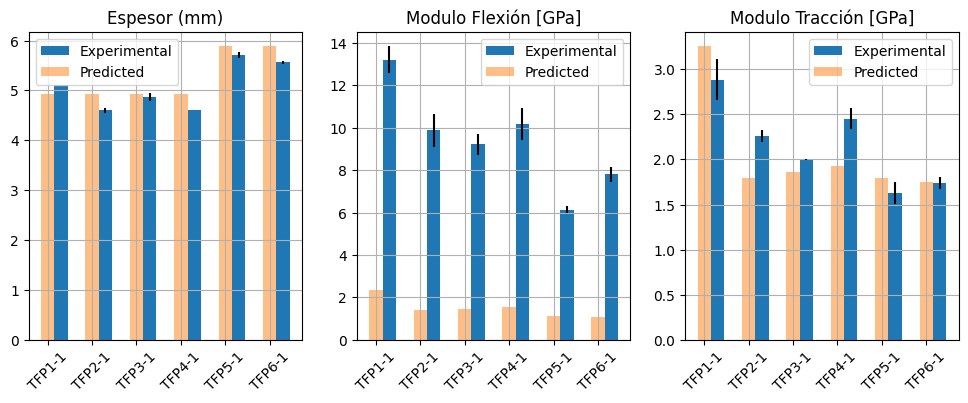

In [22]:
# plot bars with error bars Espesor (mm)
width = 0.3
idx = df_stats.index
idx_range = np.arange(len(idx))

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)

plt.bar(idx_range+width , df_stats['t [mm]']['mean'], yerr=df_stats['t [mm]']['std'], label='Experimental',width=width)
plt.bar(idx_range, tau_pred, label='Predicted', alpha=0.5, width=width)
plt.title('Espesor (mm)')

plt.legend()
plt.xticks(rotation=45)
plt.xlabel('') 
plt.grid()
plt.xticks(idx_range, idx);

ax = fig.add_subplot(132)

# plot bars with error bars Modulo Tracción [MPa] and prediction

plt.bar(idx_range+width , df_stats['E [GPa]']['mean'], yerr=df_stats['E [GPa]']['std'], label='Experimental',width=width)
plt.bar(idx_range, df_stats['E pred [GPa]'], label='Predicted', alpha=0.5, width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('') 
plt.xticks(rotation=45)
# tick labels 
plt.xticks(idx_range, idx);

plt.title('Modulo Flexión [GPa]')

ax = fig.add_subplot(133)

# plot bars with error bars Modulo Tracción [MPa] and prediction
Et_exp = full["Et [GPa]"]["mean"]
Et_exp_err = full["Et [GPa]"]["std"]

plt.bar(idx_range+width , Et_exp, yerr=Et_exp_err, label='Experimental',width=width)
plt.bar(idx_range, df_stats['Et pred [GPa]'], label='Predicted', alpha=0.5, width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('')
plt.xticks(rotation=45)
# tick labels
plt.xticks(idx_range, idx);
plt.title('Modulo Tracción [GPa]')


Text(0.5, 1.0, 'Modulo Tracción [GPa]')

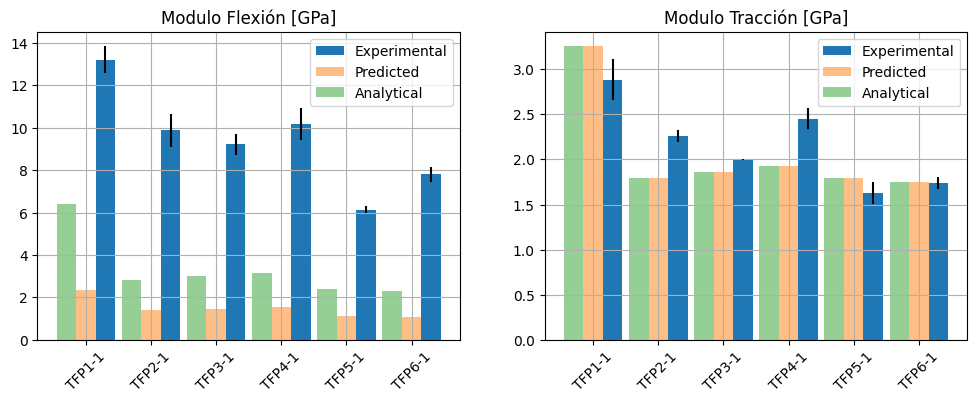

In [23]:
# plot bars with error bars Espesor (mm)
width = 0.3
idx = df_stats.index
idx_range = np.arange(len(idx))

fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(121)

# plot bars with error bars Modulo Tracción [MPa] and prediction

plt.bar(idx_range+width , df_stats['E [GPa]']['mean'], yerr=df_stats['E [GPa]']['std'], label='Experimental',width=width)
plt.bar(idx_range, df_stats['E pred [GPa]'], label='Predicted', alpha=0.5, width=width)
plt.bar(idx_range-width, df_stats['E analytical pred [GPa]'], label='Analytical', alpha=0.5, width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('') 
plt.xticks(rotation=45)
# tick labels 
plt.xticks(idx_range, idx);

plt.title('Modulo Flexión [GPa]')

ax = fig.add_subplot(122)

# plot bars with error bars Modulo Tracción [MPa] and prediction
Et_exp = full["Et [GPa]"]["mean"]
Et_exp_err = full["Et [GPa]"]["std"]

plt.bar(idx_range+width , Et_exp, yerr=Et_exp_err, label='Experimental',width=width)
plt.bar(idx_range, df_stats['Et pred [GPa]'], label='Predicted', alpha=0.5, width=width)
plt.bar(idx_range-width, df_stats['Et analytical pred [GPa]'], label='Analytical', alpha=0.5, width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('')
plt.xticks(rotation=45)
# tick labels
plt.xticks(idx_range, idx);
plt.title('Modulo Tracción [GPa]')


In [24]:
Et_exp

Name
TFP1    2.885509
TFP2    2.258503
TFP3    2.000437
TFP4    2.451362
TFP5    1.626582
TFP6    1.739870
Name: mean, dtype: float64

In [25]:
df_stats

B [mm]        t [mm]              E [GPa]                 layers  \
         mean std      mean       std       mean       std                
Nombre                                                                    
TFP1-1     25  25  5.100000  0.000000  13.201050  0.630858       [Y, Y]   
TFP2-1     25  25  4.600000  0.050000   9.869501  0.780113       [Y, X]   
TFP3-1     25  25  4.866667  0.076376   9.222003  0.495965      [Y, SX]   
TFP4-1     25  25  4.600000  0.000000  10.181815  0.770635      [Y, SY]   
TFP5-1     25  25  5.716667  0.057735   6.143105  0.161637  [Y, SX, SY]   
TFP6-1     25  25  5.566667  0.028868   7.798060  0.334186   [Y, X, SY]   

       E pred [GPa] Et pred [GPa] E analytical pred [GPa]  \
                                                            
Nombre                                                      
TFP1-1     2.335601      3.252908                6.416550   
TFP2-1     1.403094      1.796638                2.837219   
TFP3-1     1.461444      1.859624                2.992033   
TFP4-1     1.524435      1.931664                3.169097   
TFP5-1     1.121453      1.799359                2.373209   
TFP6-1     1.093269      1.746569                2.282064   

       Et analytical pred [GPa] t pred [mm]  
                                             
Nombre                                       
TFP1-1                 3.252907       4.929  
TFP2-1                 1.796637       4.929  
TFP3-1                 1.859625       4.929  
TFP4-1                 1.931664       4.929  
TFP5-1                 1.799359       5.881  
TFP6-1                 1.746568       5.881

In [26]:
df_save = pd.DataFrame({"Eb [GPa]": df_stats['E [GPa]']['mean'].values,
                        "Eb pred [GPa]": df_stats['E pred [GPa]'].values,
                        "Et [GPa]": full["Et [GPa]"]["mean"].values,
                        "Et pred [GPa]": df_stats['Et pred [GPa]'].values,
                        "Name": df_stats.index})

df_save.to_csv("output.csv", index=False)

In [27]:
params

{'geo': {'t_n': 3.025, 't_l': 0.476, 'Lx': 30},
 'sim': {'disp': 0.5},
 'tensile': {'disp': 1.0}}

In [28]:
El = df_layers.loc["Y"].values
En = df_layers.loc["nucleo"].values
tn = params["geo"]["t_n"]
tl = params["geo"]["t_l"]

In [29]:
print("El", El)
print("En", En)
print("tn", tn)
print("tl", tl)

El [8.3281]
En [0.058472]
tn 3.025
tl 0.476


In [30]:
E_eff = (En*tn + 2*(2*El*tl)) / (tn + 2*(2*tl))
print(E_eff)

[3.25290732]


In [31]:
# numerico 
print(Et_pred[0])

3.252907524007549
